# Kapitel 6: Modellauswahl

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from distutils.version import StrictVersion

In [4]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.18.1


In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

## Accuracy

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8, stratify=y)

In [9]:
X_train.shape

(105, 4)

In [10]:
X_test.shape

(45, 4)

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
clf = svc.fit(X_train, y_train)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
y_pred

array([1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1])

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.933333333333


## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


In [16]:
import numpy as np
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

[[ 1.          0.          0.        ]
 [ 0.          0.86666667  0.13333333]
 [ 0.          0.06666667  0.93333333]]


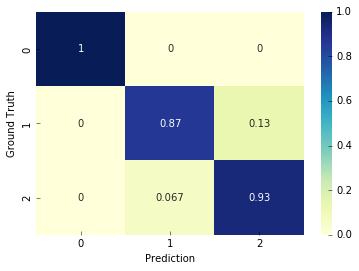

In [20]:
import seaborn as sns
sns.heatmap(cm_norm, annot=True, cmap="YlGnBu")
figure = plt.gcf()
ax = figure.add_subplot(111)
ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth')

## Precision-Recall

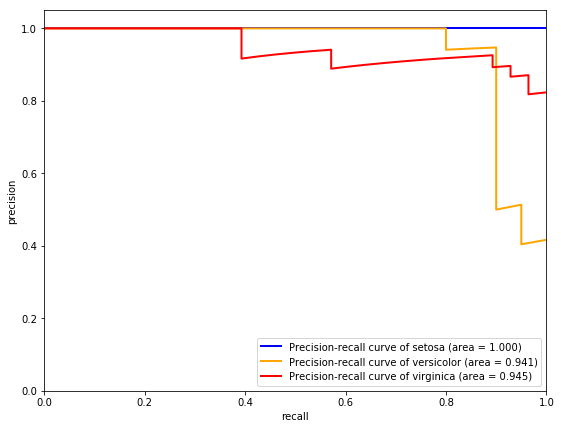

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

colors = ['blue', 'orange', 'red']

iris = load_iris()

X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 500 * n_features)]

#____________________________________________________________________
# training test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)


one_vs_rest = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=100, probability=True, random_state=12))
y_score = one_vs_rest.fit(X_train, y_train).decision_function(X_test)
y_true, y_pred = y_test, one_vs_rest.predict(X_test)

precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

#____________________________________________________________________
# Plot Precision-Recall curve for each class
fig = plt.figure(1, figsize=(9, 7))
plt.clf()
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-recall curve of {0} (area = {1:0.3f})'
                   ''.format(iris.target_names[i], average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc="lower right")
plt.show()
# fig.savefig('ML_0604.png', bbox_inches='tight')
# plt.clf()

In [25]:
from sklearn.metrics import classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

svc = SVC(kernel='rbf', C=1, gamma=1)
clf = svc.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred, digits=3, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa      1.000     1.000     1.000        15
 versicolor      0.933     0.933     0.933        15
  virginica      0.933     0.933     0.933        15

avg / total      0.956     0.956     0.956        45



## Receiver Operating Characteristic (ROC) Kurve

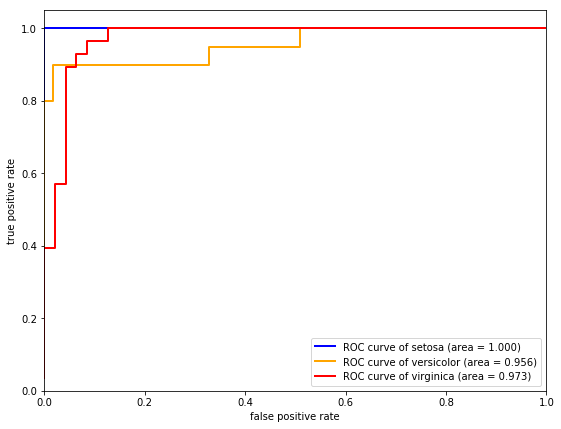

In [26]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

from scipy import interp

colors = ['blue', 'orange', 'red']

iris = load_iris()

X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 500 * n_features)]

#____________________________________________________________________
# training test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

one_vs_rest = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=100, probability=True, random_state=12))
y_score = one_vs_rest.fit(X_train, y_train).decision_function(X_test)
y_true, y_pred = y_test, one_vs_rest.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#____________________________________________________________________
# Plot Precision-Recall curve for each class
fig = plt.figure(1, figsize=(9, 7))
plt.clf()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.3f})'
                   ''.format(iris.target_names[i], roc_auc[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.show()
# fig.savefig('ML_0603.png', bbox_inches='tight')
# plt.clf()

## Metrik für Regression

In [31]:
import sklearn.datasets as data
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

boston = data.load_boston()
X = boston.data[:,5:6]
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

lr = lm.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [34]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(median_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

48.2039684111
4.70696134123
2.88512150933
0.422035691714


In [35]:
y_train_pred = lr.predict(X_train)

In [36]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(median_absolute_error(y_train, y_train_pred))
print(r2_score(y_train, y_train_pred))

41.6510201078
4.32931028766
2.86065870053
0.508968494769


## Validation

In [37]:
iris = load_iris()

X = iris.data
y = iris.target
svc = SVC(kernel='rbf', C=1, gamma=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=12)

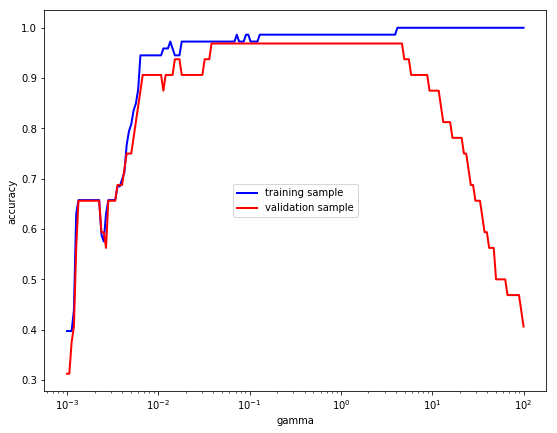

In [38]:
fig = plt.figure(1, figsize=(9, 7))
ax = fig.add_subplot(111)

param_range = np.logspace(-3, 2, 200)
train_scores, val_scores = [], []
for g in param_range:
    svc = SVC(kernel='rbf', C=1, gamma=g)
    clf = svc.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    val_scores.append(clf.score(X_val, y_val))
best_param = param_range[np.argmax(val_scores)]

plt.plot(param_range, train_scores, label="training sample", color="b", lw=2)
plt.plot(param_range, val_scores, label="validation sample", color="r", lw=2)

ax.set_xscale( "log" )
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.axis("tight")
plt.legend(loc='center')

plt.show()
# fig.savefig('ML_0601.png', bbox_inches='tight')
# plt.clf()

In [39]:
best_param = param_range[np.argmax(val_scores)]
print("Best gamma value:", best_param)

Best gamma value: 0.0382749447852


In [40]:
svc = SVC(kernel='rbf', C=1, gamma=best_param)
clf = svc.fit(X_train, y_train)
print("Best train accuracy:", clf.score(X_train, y_train))
print("Best val accuracy:", clf.score(X_val, y_val))
print("Best test accuracy:", clf.score(X_test, y_test))

Best train accuracy: 0.972602739726
Best val accuracy: 0.96875
Best test accuracy: 0.955555555556


## Cross Validation

Train accuracy: 0.981 +/- 0.046
Cross validation accuracy: 0.988 +/- 0.031


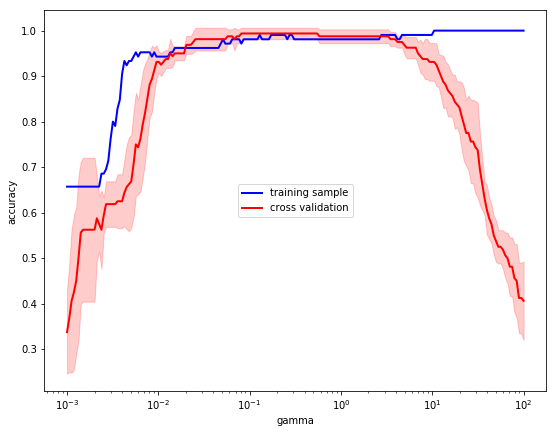

Best gamma value: 0.0811984499318
Best train accuracy: 0.971428571429
Best xval accuracy: 0.99375 +/- 0.0125
Best test accuracy: 0.977777777778


In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

iris = load_iris()

X = iris.data
y = iris.target
clf = SVC(kernel='rbf', C=1, gamma=1)

#print(X.shape, y.shape)
#print(len(X), len(y))

#____________________________________________________________________
# training test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)


#____________________________________________________________________
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Train accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))


from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=21)
scores = cross_val_score(clf, X_train, y_train, cv=cv)
print("Cross validation accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

#____________________________________________________________________
# validation plot
fig = plt.figure(1, figsize=(9, 7))
ax = fig.add_subplot(111)

param_range = np.logspace(-3, 2, 200)
train_scores, xval_scores_mean, xval_scores_std = [], [], []
for g in param_range:
    svc = SVC(kernel='rbf', C=1, gamma=g)
    clf = svc.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    xval_scores_mean.append(cross_val_score(clf, X_train, y_train, cv=cv).mean())
    xval_scores_std.append(cross_val_score(clf, X_train, y_train, cv=cv).std())
xval_scores_mean = np.array(xval_scores_mean)
xval_scores_std = np.array(xval_scores_std)

best_param = param_range[np.argmax(xval_scores_mean)]
best_param_id = np.argmax(xval_scores_mean)

ax.plot(param_range, train_scores, label="training sample", color="b", lw=2)
ax.plot(param_range, xval_scores_mean, label="cross validation", color="r", lw=2)

plt.fill_between(param_range, xval_scores_mean - xval_scores_std,
                 xval_scores_mean + xval_scores_std, alpha=0.2, color="r")

ax.set_xscale( "log" )

plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.axis("tight")
plt.legend(loc='center')

plt.show()
# fig.savefig('ML_0602.png', bbox_inches='tight')
# plt.clf()

#____________________________________________________________________
# best param
print("Best gamma value:", best_param)
svc = SVC(kernel='rbf', C=1, gamma=best_param)
clf = svc.fit(X_train, y_train)
print("Best train accuracy:", clf.score(X_train, y_train))
print("Best xval accuracy:", xval_scores_mean[best_param_id],"+/-", xval_scores_std[best_param_id])

#____________________________________________________________________
# test score
print("Best test accuracy:", clf.score(X_test, y_test))

## Grid-Suche

In [42]:
# GridSearchCV?

In [43]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

grid_params = [ {'kernel': ['linear'], 
								  'C': [0.1, 1, 10, 100, 1000]},
                {'kernel': ['rbf'],
                 'gamma': [1E-3, 1E-2, 1E-1, 1E0, 1E1],
                 'C': [0.1, 1, 10, 100]}
              ]
clf = GridSearchCV(SVC(), grid_params, cv=5)
clf.fit(X_train, y_train)

print("Best parameters:",clf.best_params_)
print("Best score:",clf.best_score_)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.980952380952


## Zufallssuche

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

rand_params = {'kernel': ['rbf'],
               'gamma': uniform(1E-2, 1E0),
               'C': uniform(0.1, 10)
               }
clf = RandomizedSearchCV(SVC(), rand_params, cv=5, n_iter=1000, random_state=112)
clf.fit(X_train, y_train)

print("Best parameters:",clf.best_params_)
print("Best score:",clf.best_score_)

Best parameters: {'C': 0.64805740282408253, 'gamma': 0.82767738217526821, 'kernel': 'rbf'}
Best score: 0.980952380952
